In [1]:
import pandas as pd 

In [15]:
df = pd.read_csv('train.csv')
df = df.drop(df.columns[0], axis=1)
translation_mapping = {
    'предмет': 'subject',
    'ФИО': 'name',
    'Ученая степень': 'academic_degree',
    'Ученое звание': 'academic_title',
    # Add more translations as needed
}

# Translate column names
df.columns = [translation_mapping.get(col, col) for col in df.columns]
df.fillna(0, inplace=True)
df['tutor_rating'] = df['tutor_rating'].round().astype(int)
df['mean_price'] = df['mean_price'].round().astype(int)
df = df.drop('name', axis=1)

translation_subject_map = {
    'matematika': 'math',
    'informatika': 'informatics',
}

df['subject'] = df['subject'].map(translation_subject_map)


In [19]:
dg = df[['subject', 'tutor_rating', 'experience', 'mean_price' ]]
dg['subject'] = dg['subject'].replace({'math': 0, 'informatics': 1})
dg['experience'] = dg['experience'].str.replace(r'\s*\bгод[а,ов]?\b|\s*\bлет\b', '', regex=True)
dg

C:\Users\chewb\AppData\Local\Temp\ipykernel_16924\3539643565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['subject'] = dg['subject'].replace({'math': 0, 'informatics': 1})
C:\Users\chewb\AppData\Local\Temp\ipykernel_16924\3539643565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['experience'] = dg['experience'].str.replace(r'\s*\bгод[а,ов]?\b|\s*\bлет\b', '', regex=True)


,subject,tutor_rating,experience,mean_price
0,0,5,31,17
1,0,4,8,12
2,1,0,11,23
3,0,4,5,0
4,0,0,19,17
...,...,...,...,...
4543,0,4,5,17
4544,1,0,30,33
4545,1,0,6,23
4546,1,0,1,10


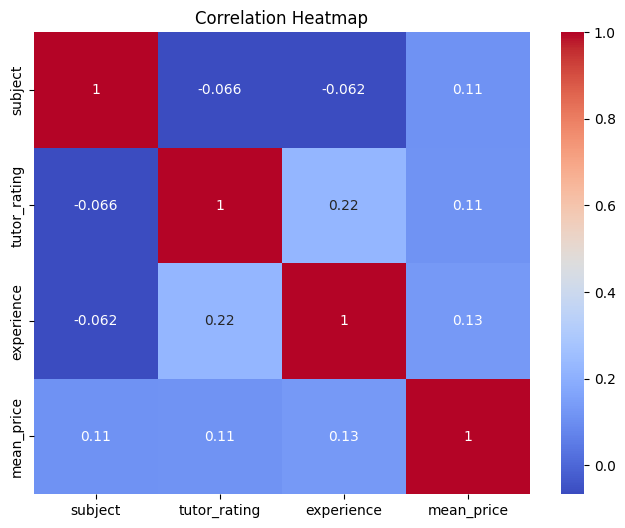

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = dg.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [23]:
dg.fillna(0, inplace=True)
dg.isna().sum()

C:\Users\chewb\AppData\Local\Temp\ipykernel_16924\1660618831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg.fillna(0, inplace=True)


subject         0
tutor_rating    0
experience      0
mean_price      0
dtype: int64

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the features and target variables
X = dg[['experience', 'tutor_rating', 'subject']]
y = dg['mean_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


MSE: 115.13568083116785


In [35]:
dd = pd.read_csv('test.csv')
dd.columns = [translation_mapping.get(col, col) for col in dd.columns]
dd.fillna(0, inplace=True)
dd['tutor_rating'] = dd['tutor_rating'].round().astype(int)
dd = dd.drop('name', axis=1)

translation_subject_map = {
    'matematika': 'math',
    'informatika': 'informatics',
}

dd['subject'] = dd['subject'].map(translation_subject_map)

ds = dd[['subject', 'tutor_rating', 'experience' ]]
ds['subject'] = ds['subject'].replace({'math': 0, 'informatics': 1})
ds['experience'] = ds['experience'].str.replace(r'\s*\bгод[а,ов]?\b|\s*\bлет\b', '', regex=True)
ds.fillna(0, inplace=True)
ds

C:\Users\chewb\AppData\Local\Temp\ipykernel_16924\3338792745.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['subject'] = ds['subject'].replace({'math': 0, 'informatics': 1})
C:\Users\chewb\AppData\Local\Temp\ipykernel_16924\3338792745.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['experience'] = ds['experience'].str.replace(r'\s*\bгод[а,ов]?\b|\s*\bлет\b', '', regex=True)
C:\Users\chewb\AppData\Local\Temp\ipykernel_16924\3338792745.py:17: SettingWithCopyWarning: 
A value is trying to be s

,subject,tutor_rating,experience
0,0,4,26
1,0,0,4
2,0,0,36
3,0,4,3
4,1,0,1
...,...,...,...
1511,0,0,9
1512,0,0,14
1513,0,0,13
1514,0,4,12


In [49]:
# Reorder the columns of ds to match the order of features in X_test
ds = ds.reindex(columns=X_test.columns)

# Make predictions on the test set
y_pred = model.predict(ds)

# Create a new DataFrame with index and predicted values
predictions_df = pd.DataFrame(y_pred, columns=['mean_price'])

# Reset the index and add the index column
predictions_df.reset_index(inplace=True)


# Save predictions_df as a CSV file
predictions_df.to_csv('mean_price_.csv', index=False)

# Print a message indicating the file has been saved
print("Predictions saved successfully.")


Predictions saved successfully.


In [45]:
da = pd.read_csv('sample_submit.csv')
da

,index,mean_price
0,0,19.878115
1,1,0.903784
2,2,19.925667
3,3,22.705076
4,4,33.187842
...,...,...
1511,1511,44.988276
1512,1512,19.691229
1513,1513,9.199322
1514,1514,10.992341
